### GDA  and QDA

Gaussian Discriminant Analysis: $\Sigma_0 = \Sigma_1$

Quadratic Discriminant Analysis: $\Sigma_0 \ne \Sigma_1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import multivariate_normal
color1 = '#1f77b4'
color0 = '#ff7f0e'

We will use a simple experiment to demonstrate the difference between GDA and QDA.
### Data generation
We define two gaussian distributions, and use them to generate samples with two different labels. Then, these samples will be randomly shuffled. Following figure shows the data distribution.

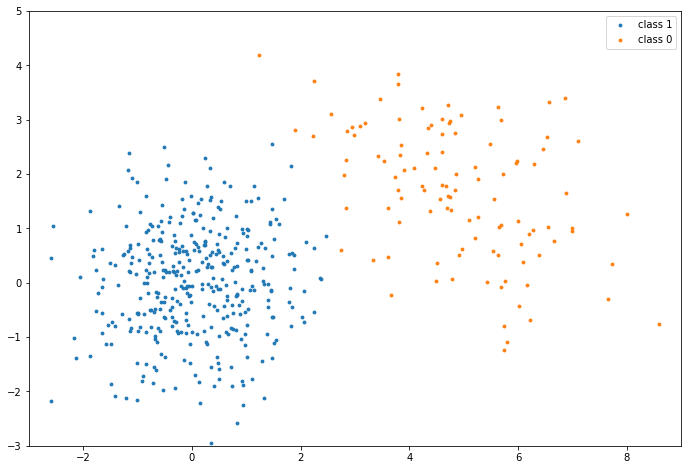

In [2]:
## Data generation
plt.figure(figsize=(15, 8))
loc1 = np.array([0, 0])
loc0 = np.array([5, 2])
scale1 = np.array([[1, 0], [0, 1]])
scale0 = np.array([[2, -1], [-1, 2]])
sample_n1 = int(1000 * np.random.rand())
sample_n0 = int(1000 * np.random.rand())
X1 = np.random.multivariate_normal(loc1, scale1, sample_n1)
X0 = np.random.multivariate_normal(loc0, scale0, sample_n0)
## Plot the data
plt.xlim(-3, 9)
plt.ylim(-3, 5)
plt.scatter(X1[:,0], X1[:,1], label="class 1", s=8, c=color1)
plt.scatter(X0[:,0], X0[:,1], label="class 0", s=8, c=color0)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()
X = np.vstack((X1, X0))
y = np.append(np.ones(sample_n1), np.zeros(sample_n0))
all_idx = np.arange(sample_n1 + sample_n0)
np.random.shuffle(all_idx)
X = X[all_idx]
y = y[all_idx]

### Helpful functions
We define a `predict` function, which will take the model and observation matrix as input and return the posterior probability and predicted labels. Also, we define a function to visualize the classification results.

In [3]:
def predict(phi_y, mean1, mean0, cov1, cov0, X):
    p1 = multivariate_normal.pdf(X, mean=mean1, cov=cov1) * phi_y
    p0 = multivariate_normal.pdf(X, mean=mean0, cov=cov0) * (1 - phi_y)
    prob = p1 / (p1 + p0)
    labels = (prob > 0.5).astype(int)
    return prob, labels
# X, y are used to plot 

def plot_distribution(phi_y, mean1, mean0, cov1, cov0, X, y):
    grid_len = 1000
    x_axis = np.linspace(-3, 9, grid_len)
    y_axis = np.linspace(-3, 5, grid_len)
    xx, yy = np.meshgrid(x_axis,y_axis)
    X_grid = np.hstack((xx.reshape(-1, 1),yy.reshape(-1, 1)))
    _, Z = predict(phi_y, mean1, mean0, cov1, cov0, X_grid)
    zz = Z.reshape(-1, grid_len)
    fig, ax = plt.subplots(constrained_layout=True)
    ax.figure.set_size_inches(15, 8)
    ax.axis(xmin=-3, xmax=9, ymin=-3, ymax=5)
    ax.set_aspect('equal', adjustable='box')
    CS = ax.contourf(xx, yy, zz)
    CS2 = ax.contour(CS, levels=CS.levels[::2], colors='r')
    ax.scatter(X[:,0], X[:,1], label="class 1", s=8, c=[color1 if l == 1 else color0 for l in y ])
    plt.show()

### Comparison
First, compute the parameters for GDA model, and visualize the classification results. 

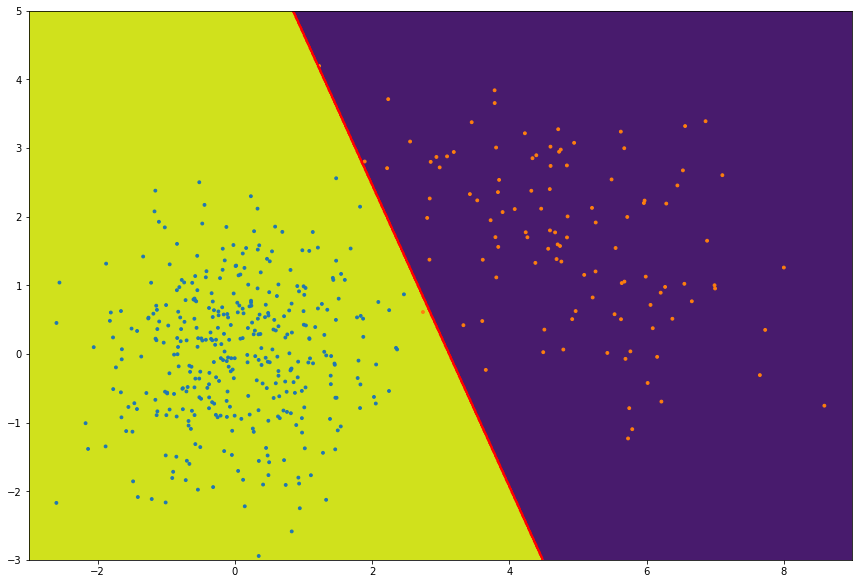

In [4]:
## GDA
### estimate phi_y
phi_y = np.sum(y) / y.shape[0]
### estimate the mean
mean1 = np.sum(X.T * y, axis=1) / sample_n1
mean0 = np.sum(X.T * (1 - y), axis=1) / (sample_n0)
### estimate the cov
tmp_m = X.T - np.outer(mean1, y) - np.outer(mean0, 1-y)
cov = tmp_m @ tmp_m.T  /y.shape[0]
plot_distribution(phi_y, mean1, mean0, cov, cov, X, y)

Now, compute the parameters for QDA model, and visualize the classification results.

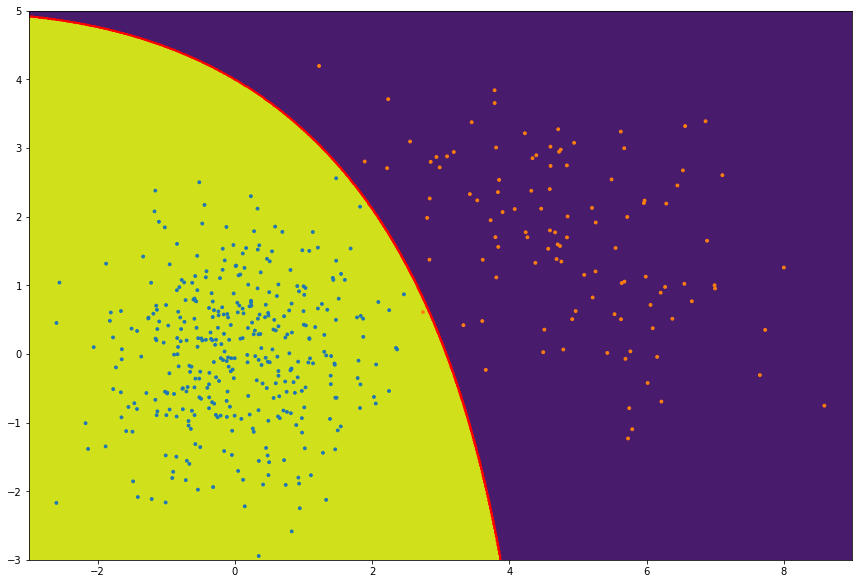

In [5]:
## QDA
### estimate phi_y
phi_y = np.sum(y) / y.shape[0]
### estimate the mean
mean1 = np.sum(X.T * y, axis=1) / sample_n1
mean0 = np.sum(X.T * (1 - y), axis=1) / sample_n0
### estimate the cov
tmp_m1 = X.T * y - np.outer(mean1, y) 
tmp_m0 = X.T * (1-y) - np.outer(mean0, 1 - y)
cov1 = tmp_m1 @ tmp_m1.T / sample_n1
cov0 = tmp_m0 @ tmp_m0.T / sample_n0
plot_distribution(phi_y, mean1, mean0, cov1, cov0, X, y)